In [25]:
import numpy as np
import math as m
from ROOT import *
import matplotlib.pyplot as plt

METODO SENZA LOOP

In [3]:
rnd=TRandom3()
rnd.SetSeed(123456789)

N=100000

for j in range (2,7):
    globals()[f'n_in{j}']=0.

s2=0.

for d in range (2,7):
    for i in range (0,N):
        x=2*rnd.Rndm()-1
        y=2*rnd.Rndm()-1
        z=2*rnd.Rndm()-1
        w=2*rnd.Rndm()-1
        h=2*rnd.Rndm()-1
        q=2*rnd.Rndm()-1
        if(d==2):
            s2 = x**2+y**2
            if(s2<1):
                n_in2=n_in2+1
        if(d==3):
            s2 = x**2+y**2+z**2
            if(s2<1):
                n_in3=n_in3+1
        if(d==4):
            s2 = x**2+y**2+z**2+w**2
            if(s2<1):
                n_in4=n_in4+1
        if(d==5):
            s2 = x**2+y**2+z**2+w**2+h**2
            if(s2<1):
                n_in5=n_in5+1
        if(d==6):
            s2 = x**2+y**2+z**2+w**2+h**2+q**2
            if(s2<1):
                n_in6=n_in6+1

p=np.array([])
p=np.append(p,n_in2/N)
p=np.append(p,n_in3/N)
p=np.append(p,n_in4/N)
p=np.append(p,n_in5/N)
p=np.append(p,n_in6/N)

for i in range (0,6):
    print ('dimension =',f'{i+2}','-->','alpha = ',2**(i+2)*p[i])
    

dimension = 2 --> alpha =  3.15488
dimension = 3 --> alpha =  4.18016
dimension = 4 --> alpha =  4.91136
dimension = 5 --> alpha =  5.2368
dimension = 6 --> alpha =  5.27296


IndexError: index 5 is out of bounds for axis 0 with size 5

METODO CON LOOP

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


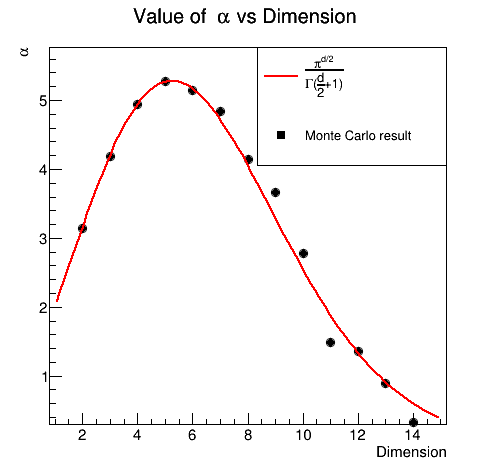

In [90]:
rn=TRandom3()
rn.SetSeed(123456789)

N=100000
n_in=0.
s=0.

a=np.array([])
dim=np.array([])

for d in range (2,15):
    n_in=0.
    for i in range (0,N):
        b=0.
        for j in range (0,d):
            s=2*rn.Rndm()-1
            b+=s*s
        if(b<1):
             n_in=n_in+1
    a=np.append(a,2**d*n_in/N)
    dim=np.append(dim,d)
    #print('dimension =',d)
    #print('alpha=',2**d*n_in/N)

g=TGraph()
c1=TCanvas("c1","",500,500)
c1.Draw()

for i in range (len(a)):
    g.SetPoint(i,dim[i],a[i])

g.SetMarkerStyle(20)
g.SetMarkerColor(kBlack)
g.SetTitle("Value of #alpha vs Dimension;Dimension;#alpha")
g.Draw("AP")

f=TF1("f","pow(TMath::Pi(),x/2)/TMath::Gamma(x/2+1)",1,15)
f.SetLineColor(kRed)
f.Draw("SAME")

#c1.BuildLegend()

legend = TLegend(0.52,0.65,0.9,0.9)
legend.SetTextSize(0.03)
legend.AddEntry("f","#frac{#pi^{d/2}}{#Gamma(#frac{d}{2}+1)} ","l")
legend.AddEntry("g","Monte Carlo result","p")
legend.Draw()

